# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr

In [3]:
# If you want to define your own color maps or ticks,
# you may want to use these packages
import matplotlib.colors as colors
import numpy as np

# Step 2 - Load and prepare hazard data
Use xarray to load hazard data.\
If this data is not a two-dimensional array, perform your desired selection or calculation (eg mean, min, max, percentile) to reduce data to 2D.

In [4]:
# load some dataset
ds = xr.open_dataset("/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds = ds.rename({"latitude":"lat", "longitude": "lon"})
ds


<xarray.Dataset> Size: 5MB
Dimensions:                   (lat: 691, lon: 886, class_code: 66)
Coordinates:
  * lat                       (lat) float32 3kB -44.5 -44.45 ... -10.05 -10.0
  * lon                       (lon) float32 4kB 112.0 112.1 ... 156.2 156.2
  * class_code                (class_code) int64 528B 0 1 2 3 4 ... 62 63 64 65
Data variables:
    stern_dehoedt_2000_minor  (lat, lon) float64 5MB ...
    class short description   (class_code) <U4 1kB ...
    class long description    (class_code) <U35 9kB ...
Attributes:
    data_source:           BARPA ia39
    notebook:              stern_dehoedt_ernst_2000_BARPA.ipynb
    Global_Warming_Level:  1.2
    reference:             Stern, H., De Hoedt, G., & Ernst, J. (2000). Objec...

# Step 3 - Plot
Use ```plot_acs_hazard``` to visualise the hazard on a map of Australia.

There are quite a few options to modify this plotting. At a minimum, you will need:
 - **data**, a 2D xarray.DataArray of your hazard
 - **regions**, use the regions_dict to access region or state boundary shape data
 - **title**, title of plot naming the index or hazard you are plotting
 - **date_range**, date range of the data you have plotted, appears as a subtitle under the title
 - **cmap**, use the cmap_dict to access a range of recommended colormaps
 - **ticks**, use the tick_dict to access a range of useful ranges or input your own list or array
 - **cbar_label**, is the label for the colorbar. Give name and unit
 - **cbar_extend**, controls the arrows of the colorbar. Indicates that values beyond the colorbar are possible. Use 'neither' for finite ranges eg deciles. Use 'both' for anomalies or temperatures. Use 'max' for total rainfall, where negative values are not possible, but very large positive values are possible. "min" is also an option.
 - **dataset_name**, name of the data source eg "AGCD v2", "BARPA-R ACCESS-CM2"
 - (**baseline**, If plotting anomalies, give the base period as a string, eg "1961-1990")

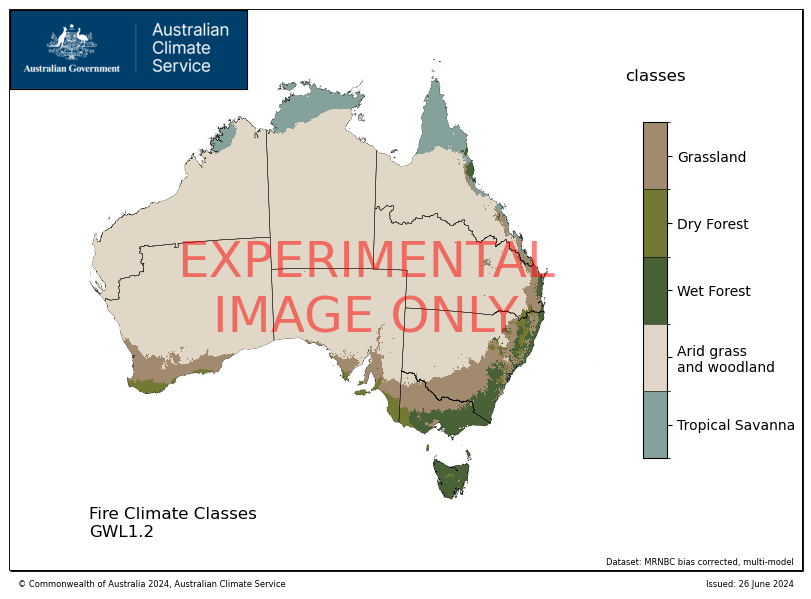

In [5]:
# example of categorical data
plot_acs_hazard(data = ds.stern_dehoedt_2000_minor,
                regions = regions_dict['ncra_regions'],
                title = "Fire Climate Classes",
                date_range = "GWL1.2",
                cmap = colors.ListedColormap(["#84a19b", "#e0d7c6", "#486136", "#737932", "#a18a6e",]),
                ticks = [100, 101, 102, 103, 104,],
                tick_labels = ["Tropical Savanna", "Arid grass \nand woodland", "Wet Forest", "Dry Forest", "Grassland",],
                cbar_label = "classes",
                dataset_name = "MRNBC bias corrected, multi-model",
                outfile = "figures/out.png",
                );

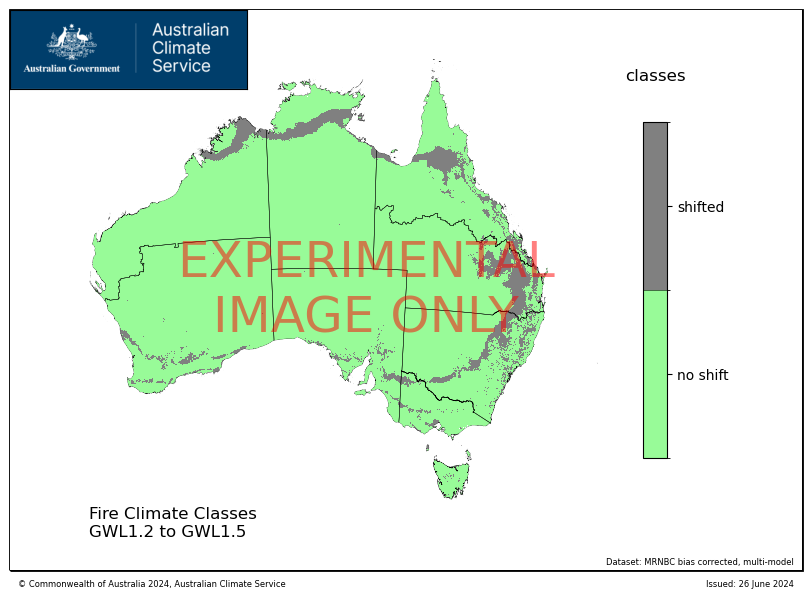

In [6]:
# example of two level categorical data
ds = xr.open_dataset("/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")
da = ds.stern_dehoedt_2000_minor
plot_acs_hazard(data = da,
                regions = regions_dict['ncra_regions'],
                title = "Fire Climate Classes",
                date_range = "GWL1.2 to GWL1.5",
                cmap = colors.ListedColormap(["palegreen", "grey",]),
                ticks = [0, 1,],
                tick_labels = ["no shift", "shifted",],
                cbar_label = "classes",
                dataset_name = "MRNBC bias corrected, multi-model",
                outfile = "figures/out.png",
                );

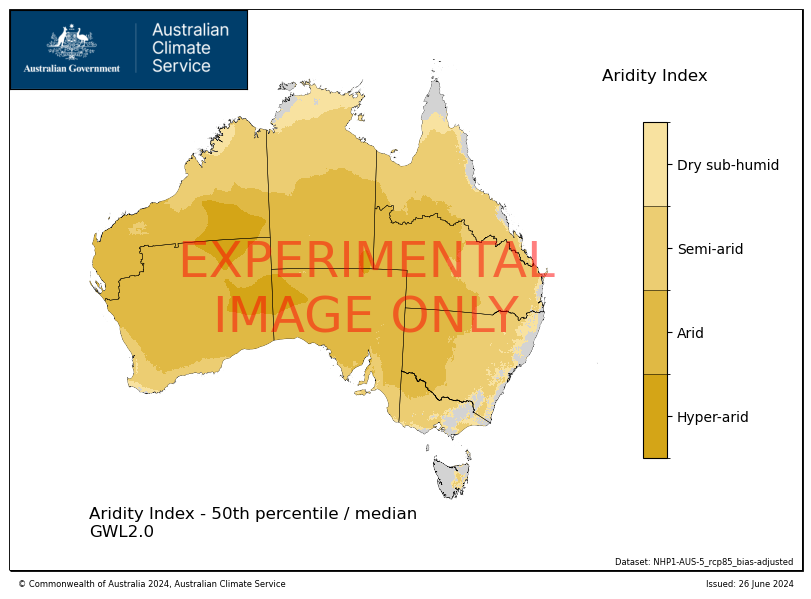

In [7]:
# Categorical example with non-linear index values and NaN values over land

ds_ai = xr.open_dataset("/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL20_percentiles10-50-90.nc")

da = ds_ai.sel(quantile = 0.5).AI

plot_acs_hazard(data =  da.where(da<0.65),
                regions = regions_dict['ncra_regions'],
                title = "Aridity Index - 50th percentile / median",
                date_range = "GWL2.0",
                cmap = cmap_dict["aridity"],
                ticks = tick_dict['aridity_index_ticks'],
                tick_labels = tick_dict['aridity_index_labels'],
                cbar_label = "Aridity Index",
                dataset_name = "NHP1-AUS-5_rcp85_bias-adjusted",
                outfile = "figures/out.png",
                );

In [16]:
filename = "/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_GWL12.nc"
ds_pr = xr.open_dataset(filename)
ds_pr

<xarray.Dataset> Size: 2MB
Dimensions:   (lat: 691, lon: 886)
Coordinates:
  * lat       (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon       (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Data variables:
    low_freq  (lat, lon) float32 2MB ...
Attributes:
    history:      Thu Jun 20 13:10:18 AEST 2024: ncl < /home/561/asp561/Code/...
    title:        20-year mean lows at GWL1.2 for BOM BARPA-R ACCESS-CM2 r4i1...
    source:       ACS hazard data in /g/data/ia39/ncra/extratropical_storms/5km/
    sigma_level:  Values for the 20 year period corresponding to Global warmi...

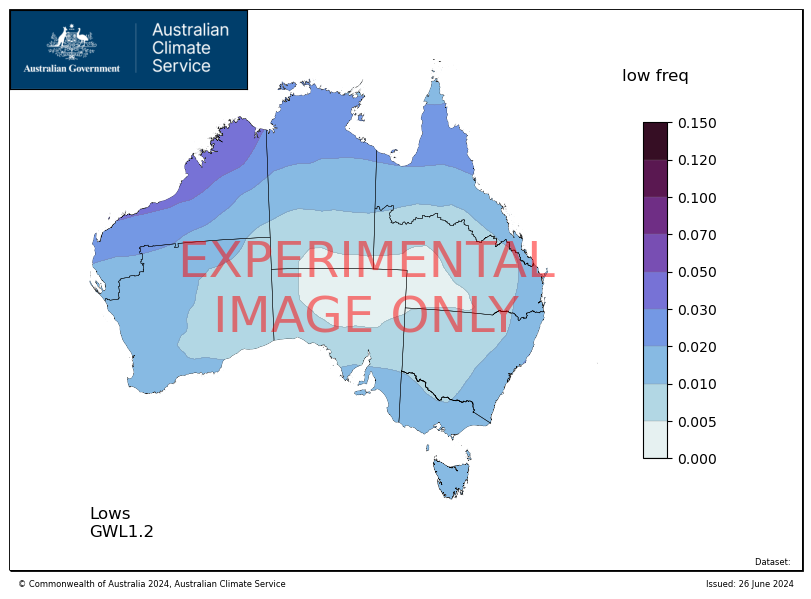

In [12]:
plot_acs_hazard(data = ds_pr.low_freq,
                regions = regions_dict['ncra_regions'],
                title = "Lows",
                date_range = "GWL1.2",
                cmap = cmap_dict["xts_freq"],
                ticks = tick_dict['xts_freq'],
                cbar_label = "low freq",
                dataset_name = "",
                outfile = "figures/out.png",
                );

In [14]:
acs_regional_stats(ds=ds_pr, 
                   infile = filename.split("/")[-1], 
                   mask = "fractional", 
                   how = ["mean", "min", "max"],)

!warning very slow! Calculating fractional mask every time is very slow.         
Please considering calculating ```mask = regions.mask_3D_frac_approx(ds)``` before this function.


,abbrevs,names,low_freq_mean,low_freq_min,low_freq_max
region,,,,,
0,WANorth,Western Australia North,0.024369,0.007841,0.040507
1,WASouth,Western Australia South,0.010971,0.006013,0.021467
2,NSW,New South Wales and Australian Capital Territory,0.009713,0.004838,0.020519
3,VIC,Victoria,0.012203,0.009205,0.019655
4,SA,South Australia,0.005986,0.003246,0.015542
5,TAS,Tasmania,0.015369,0.013912,0.018364
6,NT,Northern Territory,0.014975,0.003508,0.029563
7,QLDNorth,Queensland North,0.015692,0.006855,0.023691
8,QLDSouth,Queensland South,0.006818,0.003834,0.015946


## Step 4: Calculate NCRA region statistics

In [4]:
# import needed packages
from acs_area_statistics import acs_regional_stats, regions

In [6]:
path = "/g/data/ia39/ncra/drought_aridity/ai/"
filename = "AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL20_percentiles10-50-90.nc"
ds_ai = xr.open_dataset(path+filename)

da_summary = acs_regional_stats(ds=ds_ai.sel(quantile = 0.5), infile = filename, mask = "fractional", dims=("lat", "lon"), how = ["mean", "min", "max"],)
da_summary

!warning very slow! Calculating fractional mask every time is very slow.         
Please considering calculating ```mask = regions.mask_3D_frac_approx(ds)``` before this function.


,abbrevs,names,AI_mean,AI_min,AI_max
region,,,,,
0,WANorth,Western Australia North,0.194167,0.006631,0.598078
1,WASouth,Western Australia South,0.130666,0.007682,0.688539
2,NSW,New South Wales and Australian Capital Territory,0.315667,0.072158,1.586698
3,VIC,Victoria,0.442371,0.136251,1.863119
4,SA,South Australia,0.115364,0.009923,0.661942
5,TAS,Tasmania,1.243412,0.374532,3.778447
6,NT,Northern Territory,0.260472,0.016125,0.793245
7,QLDNorth,Queensland North,0.366306,0.126393,2.082371
8,QLDSouth,Queensland South,0.202862,0.065553,1.354040


In [ ]:
ds_ai = xr.open_dataset("/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_GWL20_percentiles10-50-90.nc")

da_summary = acs_regional_stats(ds=ds_ai.sel(quantile = 0.5), mask = "fractional", dims=("lat", "lon"), how = ["mean", "min", "max"], outfile="out.csv")
da_summary

# Access the docstring for more info

In [19]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='aus_states_territories',
    regions=None,
    data=None,
    mask_not_australia=True,
    facecolor=None,
    edgecolor='black',
    figsize=(8, 6),
    title=None,
    date_range='',
    crs=None,
    area_linewidth=0.3,
    xlim=(110, 170),
    ylim=(-45, -5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x1469fd7e0d30>,
    cbar_extend='neither',
    ticks=None,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    label_states=False,
    contourf=True,
    contour=True,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    infile=None,
    outfile=None,
)
Docstring:
This function takes a name of an Australian shapefile collection for data in /g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/ and hazard data from a 2D Xarray data array
and plots the data on a map of Australia with the shape outlines. 

Parameters
----------
name: str
  

In [20]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds,
    var=None,
    mask=None,
    start=None,
    end=None,
    dims=('time', 'lat', 'lon'),
    how='mean',
    quantile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
)
Docstring:
This function takes an Xarray dataset (ds) with variable (var) and multiple dimensions (eg time, lat, and lon), 
then selects the time range between two years (start and end), 
and applies regions.mask_3D_frac_approx fractional mask (frac) to compute a regional statistic (how, eg "mean") over two or three dimensions.

Parameters
----------
ds: xr.Dataset or xr.DataArray
    expects an xr.Dataset with variable var and dimensions time, lat, and lon.
    
var: str
    name of variable in ds, eg "pr" or "tas". If None, then tries to infer the var name from the data

mask:  xarray.DataArray 'mask' or ["fractional", "centred", "min_overlap"] 
    expects a precalculated mask, or will calculate one of the three options. If "min_overlap" selected,